<a href="https://colab.research.google.com/github/soroushmirzaei/medical-biological-projects/blob/main/heart-failure-disease-prediction/heart-failure-disease-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import mathematics statistics libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning deep learning libraries
import tensorflow as tf
from tensorflow import keras


In [ ]:
#load dataset
data = pd.read_csv('heart-disease-dataset.csv', skiprows = 1, names = np.arange(1, 15))


In [ ]:
header_desc = """1. age
2. sex
3. chest pain type
4. resting blood pressure
5. cholestoral
6. fasting blood sugar
7. resting electrocardiographic
8. maximum heart rate
9. exercise induced angina
10. st depression
11. peak exercise slope
12. number of major vessels
13. thalassemia
14. target"""

header = {
    int(line.split(' ')[0][:-1]) : ' '.join(line.split(' ')[1:]) for line in header_desc.split('\n')
}

data = data.rename(lambda col : header[col].title(), axis = 1)
data.head()


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,St Depression,Peak Exercise Slope,Number Of Major Vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#dataset information
print(f'Dataset Shape:\n{data.shape[0]} Rows {data.shape[1]} Columns\n')
print(f'Dataset Columns:\n{np.array(data.columns)}\n')
print(f'Dataset Columns Type:\n{np.array([(col, dtype) for col, dtype in data.dtypes.to_dict().items()])}')


Dataset Shape:
303 Rows 14 Columns

Dataset Columns:
['Age' 'Sex' 'Chest Pain Type' 'Resting Blood Pressure' 'Cholestoral'
 'Fasting Blood Sugar' 'Resting Electrocardiographic' 'Maximum Heart Rate'
 'Exercise Induced Angina' 'St Depression' 'Peak Exercise Slope'
 'Number Of Major Vessels' 'Thalassemia' 'Target']

Dataset Columns Type:
[['Age' dtype('int64')]
 ['Sex' dtype('int64')]
 ['Chest Pain Type' dtype('int64')]
 ['Resting Blood Pressure' dtype('int64')]
 ['Cholestoral' dtype('int64')]
 ['Fasting Blood Sugar' dtype('int64')]
 ['Resting Electrocardiographic' dtype('int64')]
 ['Maximum Heart Rate' dtype('int64')]
 ['Exercise Induced Angina' dtype('int64')]
 ['St Depression' dtype('float64')]
 ['Peak Exercise Slope' dtype('int64')]
 ['Number Of Major Vessels' dtype('int64')]
 ['Thalassemia' dtype('int64')]
 ['Target' dtype('int64')]]


In [ ]:
#mean based on target
data.groupby('Target').mean()


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,St Depression,Peak Exercise Slope,Number Of Major Vessels,Thalassemia
Target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


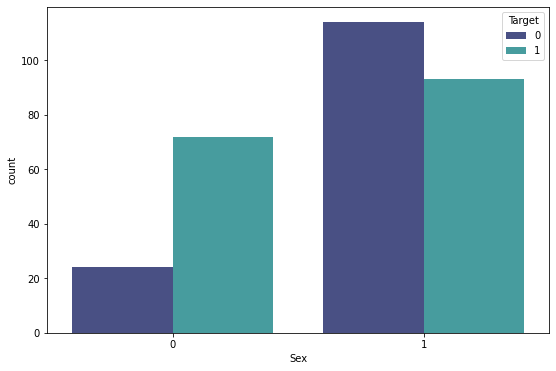

In [ ]:
#draw countplot based on sex and target
plt.figure(figsize = (9, 6))
sns.countplot(data = data, x = 'Sex', hue = 'Target',
              palette = 'mako')
plt.show()


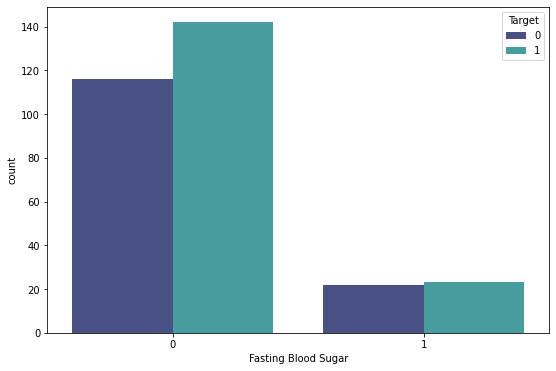

In [ ]:
#draw countplot based on fasting blood sugar and target
plt.figure(figsize = (9, 6))
sns.countplot(data = data, x = 'Fasting Blood Sugar', hue = 'Target', palette = 'mako')
plt.show()


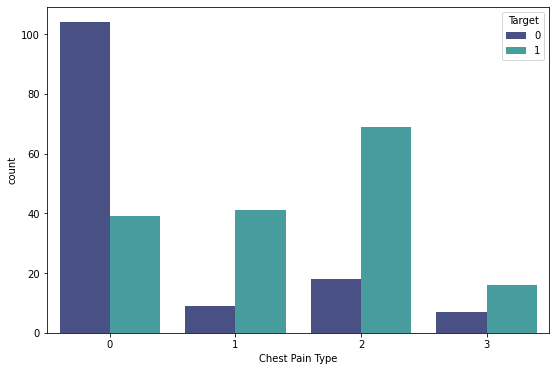

In [ ]:
#draw countplot based on chest pain type and target
plt.figure(figsize = (9, 6))
sns.countplot(data = data, x = 'Chest Pain Type', hue = 'Target',
              palette = 'mako')
plt.show()


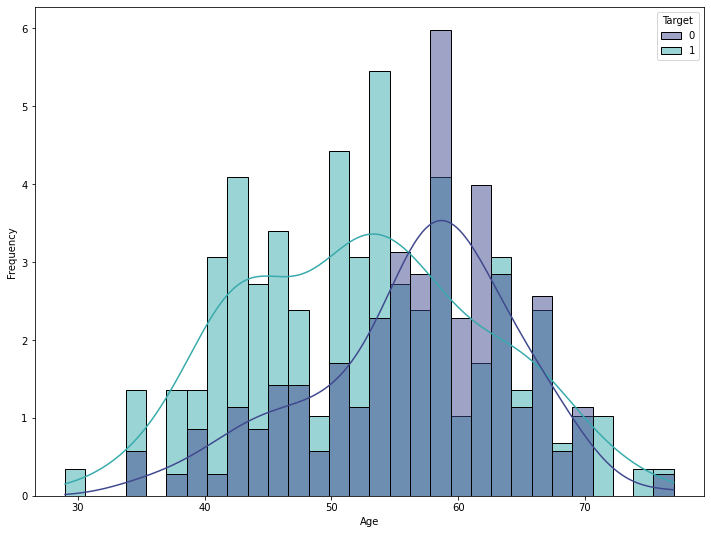

In [ ]:
#draw barplot based on age and target
plt.figure(figsize = (12, 9))
sns.histplot(data = data, x = 'Age', hue = 'Target', bins = 30, kde = True, 
             stat = 'frequency', palette = 'mako')
plt.show()


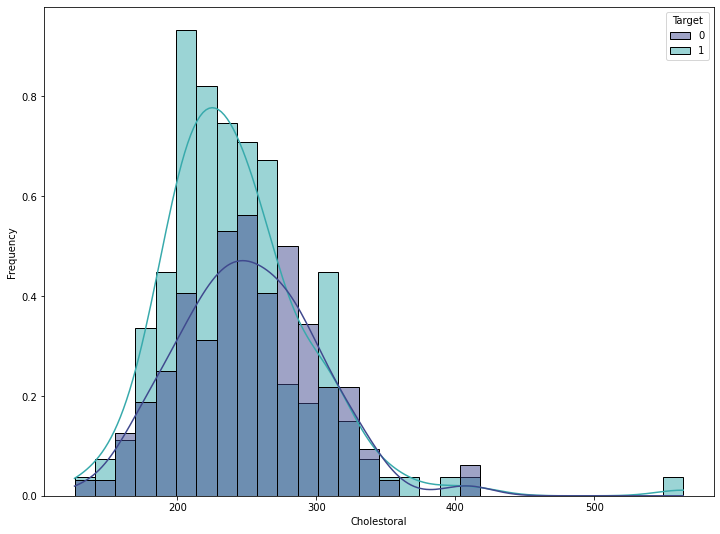

In [ ]:
#draw histplot based on cholestoral and target
plt.figure(figsize = (12, 9))
sns.histplot(data = data, x = 'Cholestoral', hue = 'Target', kde = True,
             palette = 'mako', stat = 'frequency', bins = 30)
plt.show()


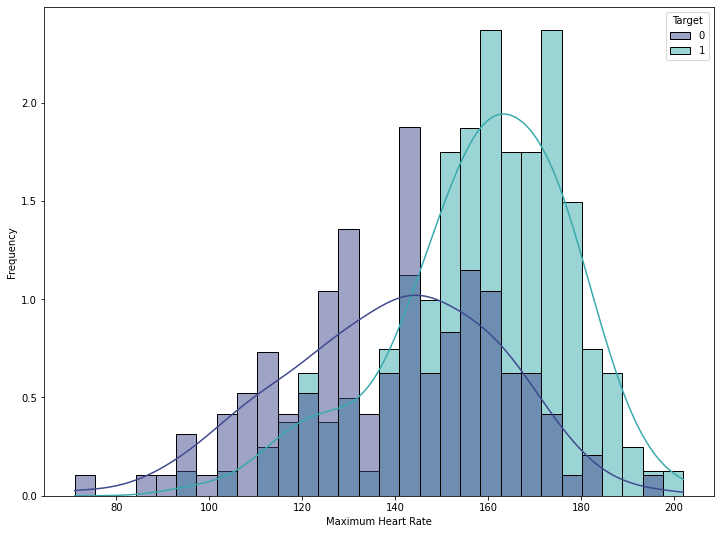

In [ ]:
#draw histplot based on cholestoral and target
plt.figure(figsize = (12, 9))
sns.histplot(data = data, x = 'Maximum Heart Rate', hue = 'Target', kde = True,
             palette = 'mako', stat = 'frequency', bins = 30)
plt.show()


In [ ]:
#draw pairplot based on target
high_card_col = [col for col in data.columns if data[col].nunique() > 5]
high_card_col_data = pd.concat([data[high_card_col], data['Target']], axis = 1)


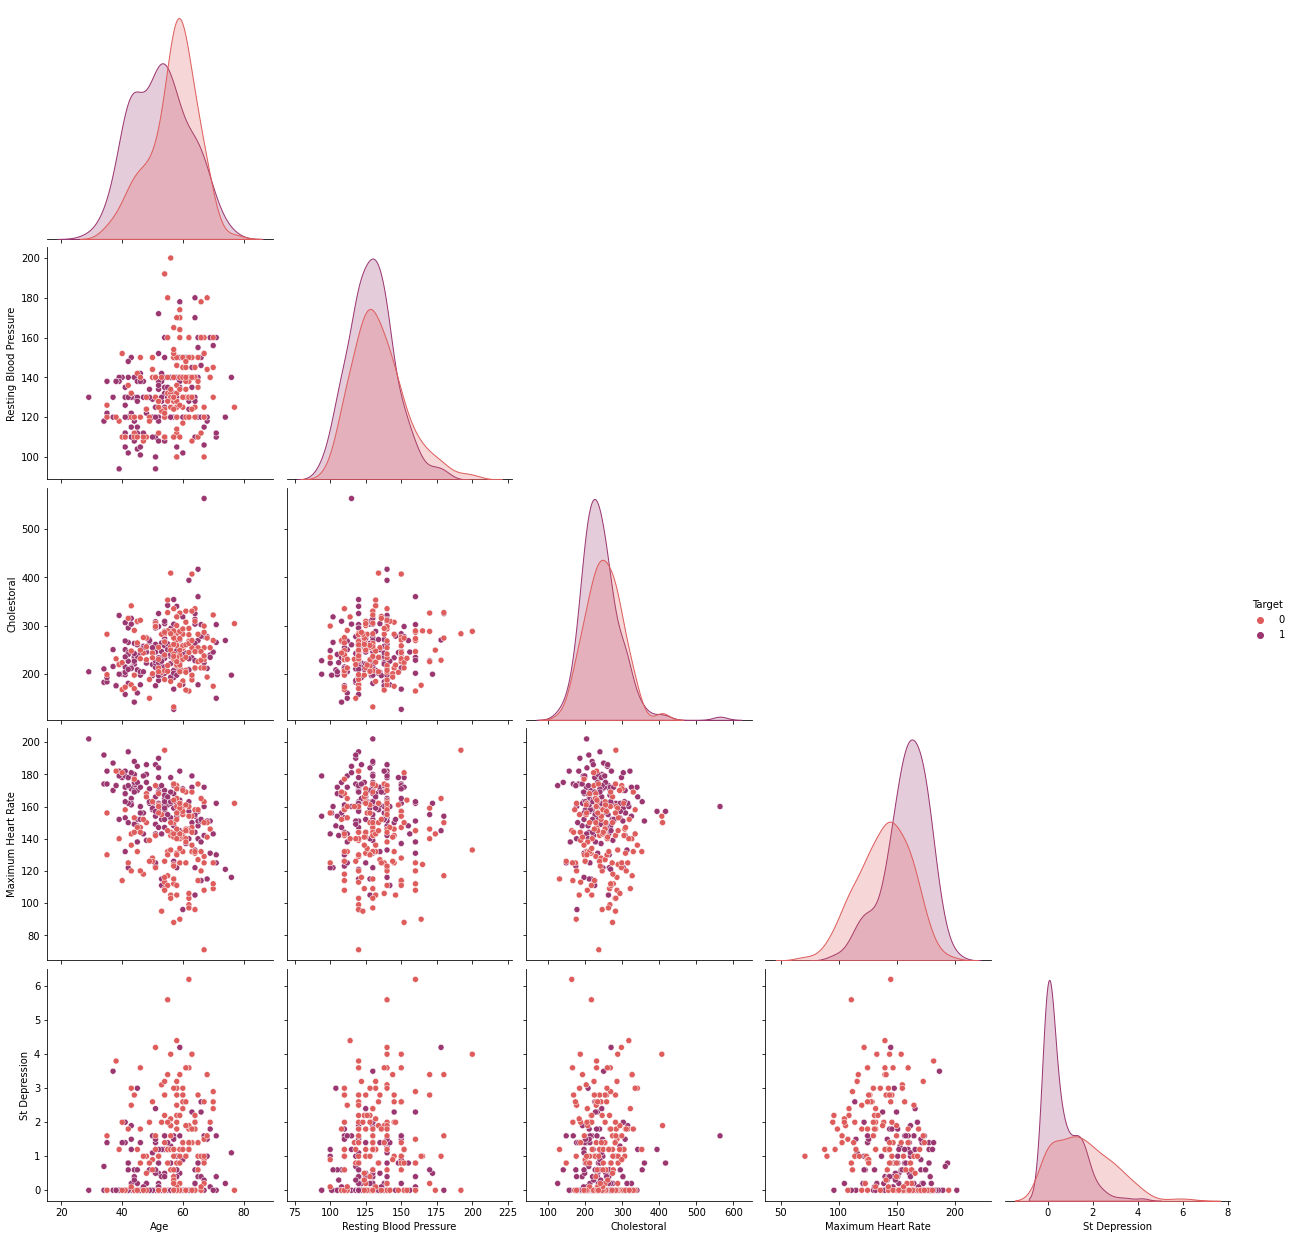

In [ ]:
#scatter pairplot
sns.pairplot(high_card_col_data, hue = 'Target',
             kind='scatter', height = 3.5, corner = True,
             diag_kind='auto', palette = 'flare')
plt.show()


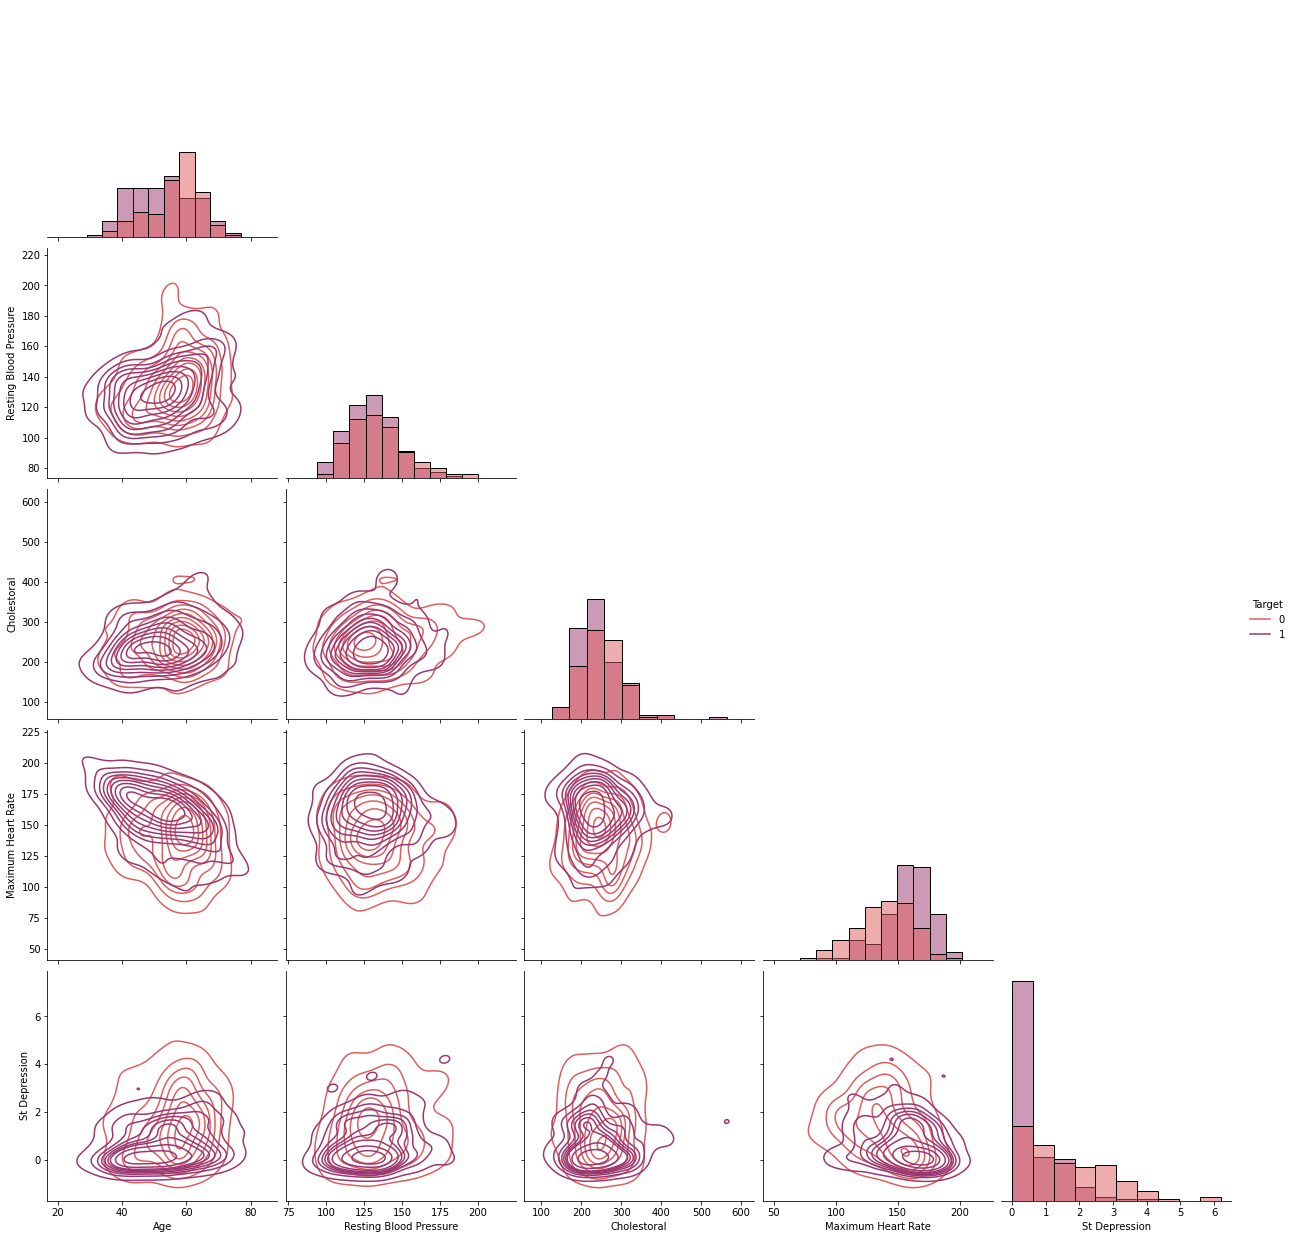

In [ ]:
#kde pairplot
sns.pairplot(high_card_col_data, hue = 'Target',
             kind = 'kde', diag_kind = 'hist', height = 3.5, corner = True,
             palette = 'flare', diag_kws = {'bins':10})
plt.show()


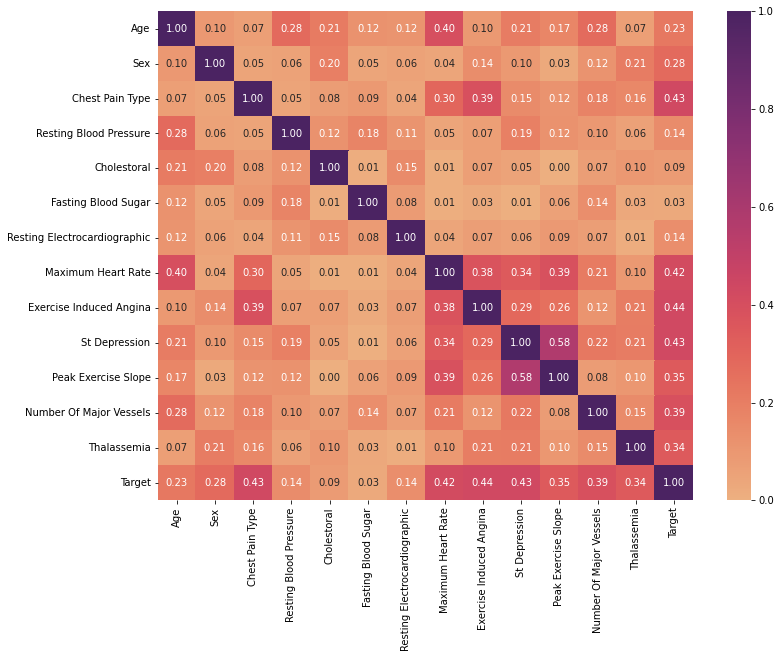

In [ ]:
#draw heatmap of correlation
plt.figure(figsize = (12, 9))
sns.heatmap(data.corr().abs(), cmap = 'flare',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.show()


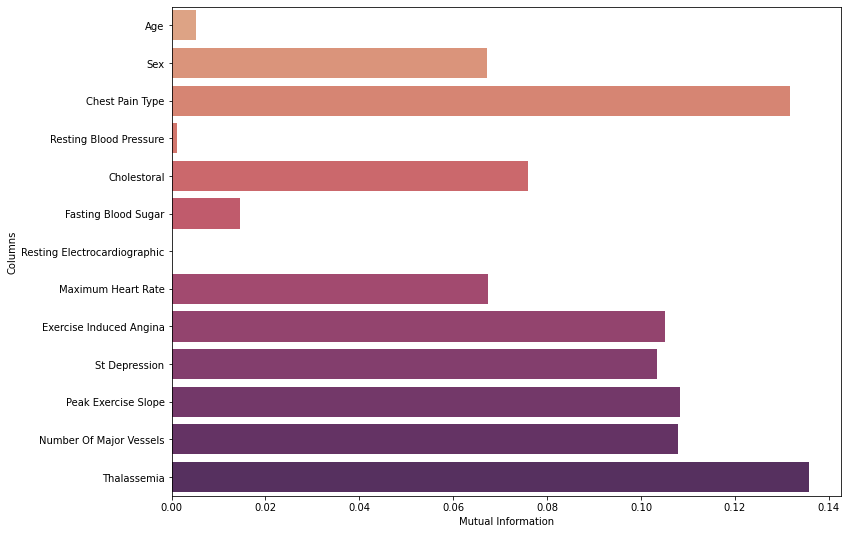

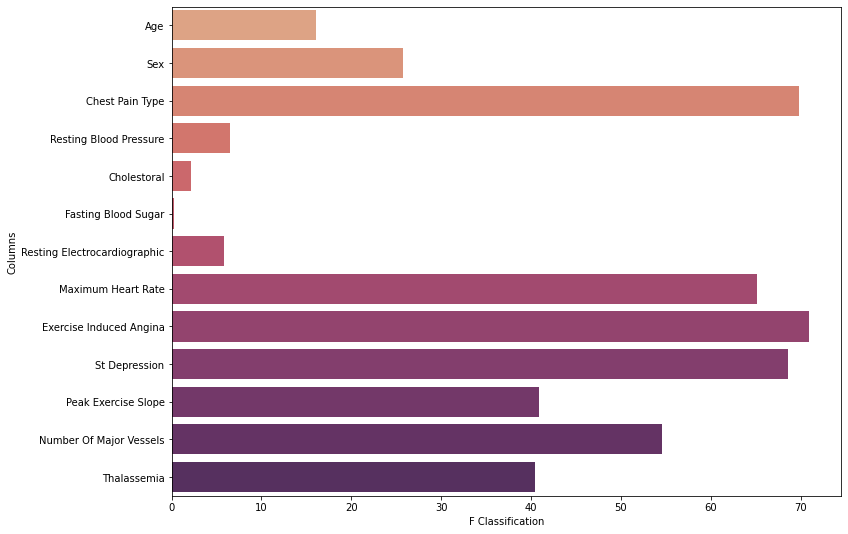

In [ ]:
#calculation of mutual information and feature selection
from sklearn.feature_selection import mutual_info_classif, f_classif

plt.figure(figsize = (12, 9))
sns.barplot(y = data.drop('Target', axis = 1).columns,
            x = pd.Series(mutual_info_classif(X = data.drop('Target', axis = 1), y = data['Target']),
                          index = data.drop('Target', axis = 1).columns),
            palette = 'flare', orient = 'h')
plt.ylabel('Columns'); plt.xlabel('Mutual Information')
plt.show()

plt.figure(figsize = (12, 9))
sns.barplot(y = data.drop('Target', axis = 1).columns,
            x = pd.Series(f_classif(X = data.drop('Target', axis = 1), y = data['Target'])[0],
                          index = data.drop('Target', axis = 1).columns),
            palette = 'flare', orient = 'h')
plt.ylabel('Columns'); plt.xlabel('F Classification')
plt.show()


In [ ]:
#principle component analysis
from sklearn.decomposition import PCA

pca = PCA(random_state = True)
pca_data = pd.DataFrame(pca.fit_transform(data.iloc[:,:-1], data.iloc[:,-1]),
                        columns = [f'PCA {col}' for col in data.columns[:-1]])

pca_target = pd.concat([pca_data, data.iloc[:,-1]], axis = 1)


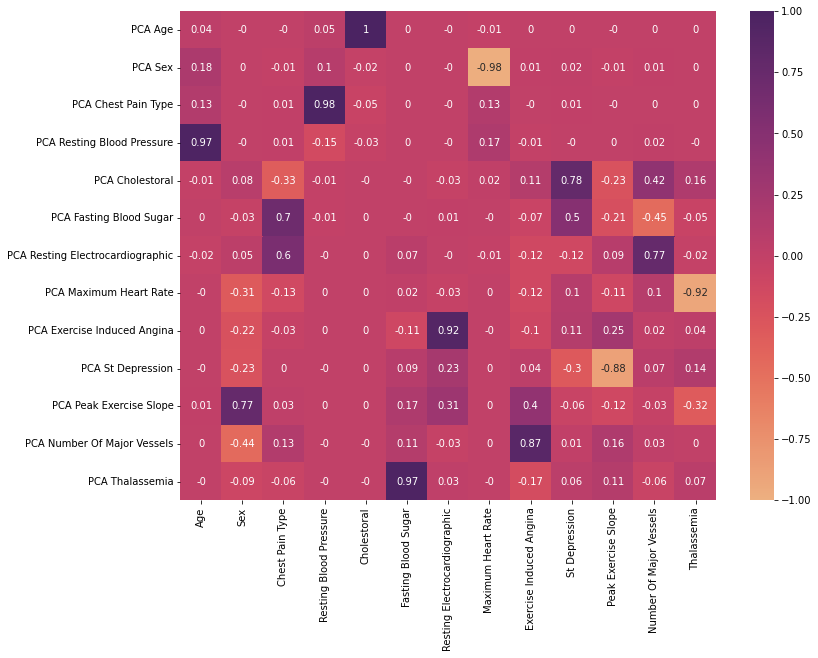

In [ ]:
#plot component heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(pd.DataFrame(pca.components_, columns = [col for col in data.columns[:-1]],
                         index = [f'PCA {col}' for col in data.columns[:-1]]).round(2),
            annot = True, vmin = -1, vmax = 1, cmap = 'flare')
plt.show()


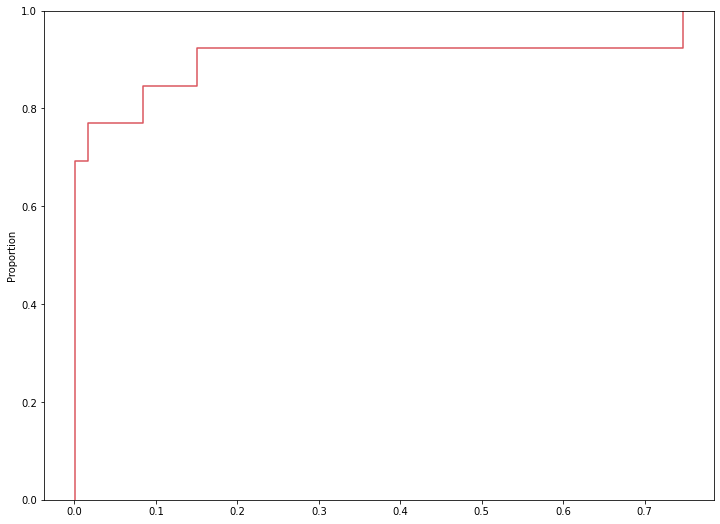

In [ ]:
#plot pca varience ratio
plt.figure(figsize = (12, 9))
sns.ecdfplot(pd.Series(pca.explained_variance_ratio_, index = [f'PCA {col}' for col in data.columns[:-1]]),
             color = '#da555d')
plt.show()


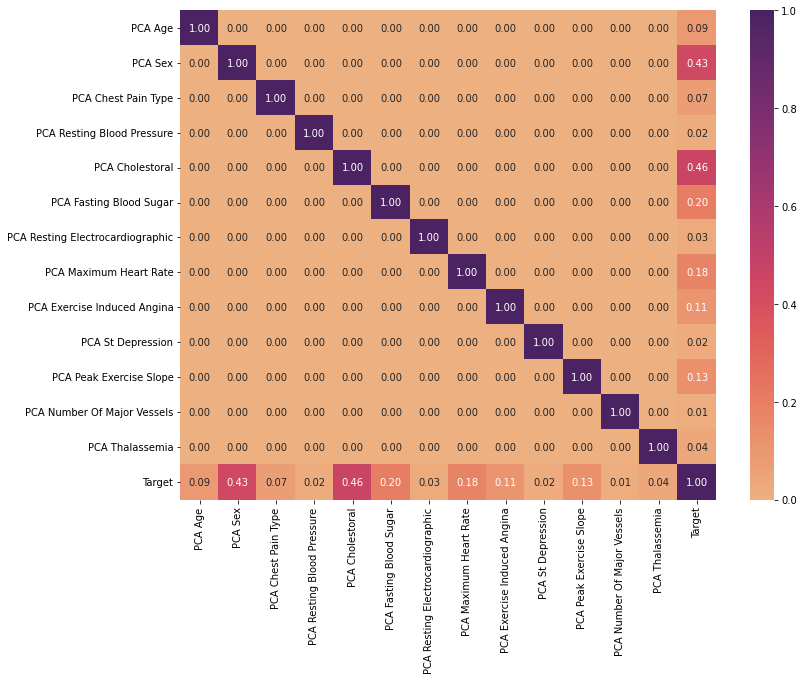

In [ ]:
#draw heatmap of pca target correlation
plt.figure(figsize = (12, 9))
sns.heatmap(pca_target.corr().abs(), cmap = 'flare',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.show()


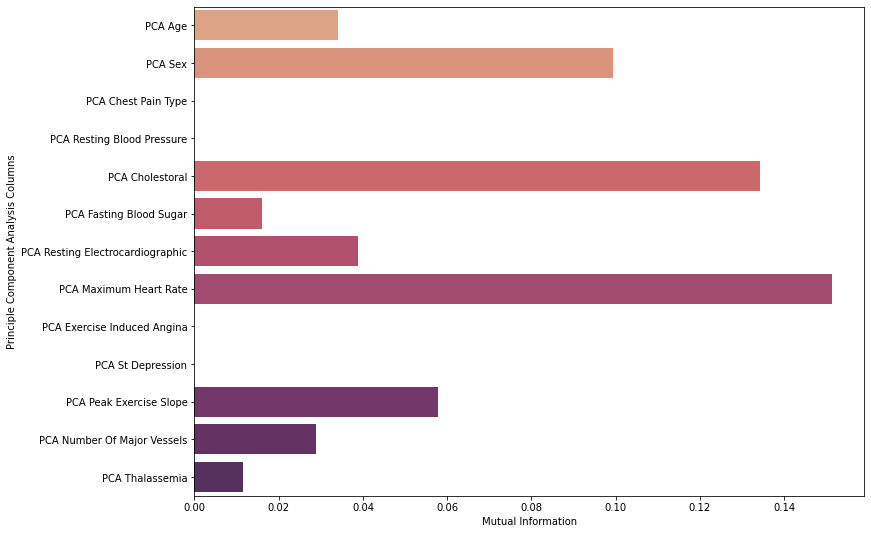

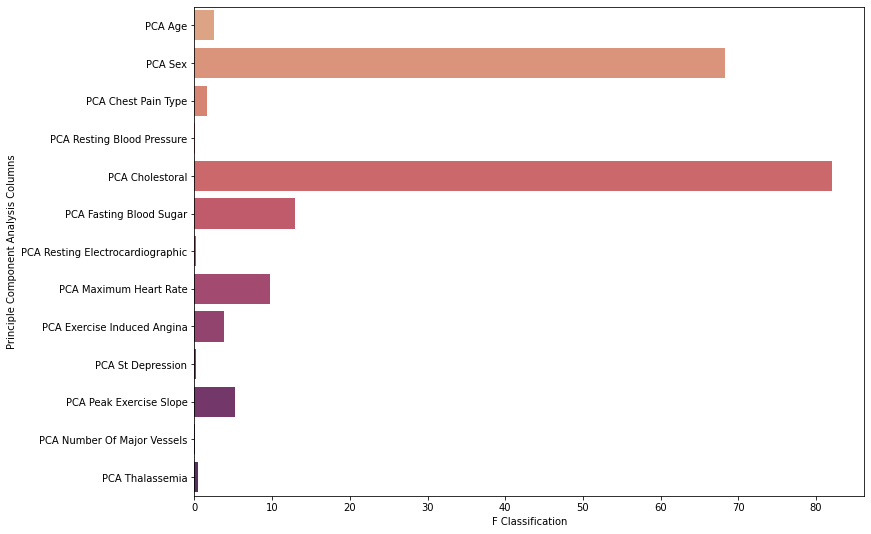

In [ ]:
#calculation of mutual information and feature selection
plt.figure(figsize = (12, 9))
sns.barplot(y = pca_target.iloc[:,:-1].columns,
            x = pd.Series(mutual_info_classif(X = pca_target.iloc[:,:-1], y = pca_target.iloc[:,-1]),
                          index = pca_target.iloc[:,:-1].columns), palette = 'flare', orient = 'h')
plt.ylabel('Principle Component Analysis Columns'); plt.xlabel('Mutual Information')
plt.show()

plt.figure(figsize = (12, 9))
sns.barplot(y = pca_target.iloc[:,:-1].columns,
            x = pd.Series(f_classif(X = pca_target.iloc[:,:-1], y = pca_target.iloc[:,-1])[0],
                          index = pca_target.iloc[:,:-1].columns), palette = 'flare', orient = 'h')
plt.ylabel('Principle Component Analysis Columns'); plt.xlabel('F Classification')
plt.show()


In [ ]:
#concatenate data and pca data base on info graphic mutual information
data = pd.concat([data, pca_data[['PCA Sex', 'PCA Cholestoral', 'PCA Maximum Heart Rate']]],
                 axis = 1)

#sample of data
data.head()


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,St Depression,Peak Exercise Slope,Number Of Major Vessels,Thalassemia,Target,PCA Sex,PCA Cholestoral,PCA Maximum Heart Rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2.873838,-0.072468,1.084704
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-39.871374,2.598773,0.519390
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,-23.636820,0.436244,0.514733
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,-28.438036,0.076565,0.074112
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,-15.874468,-0.242000,0.373915


In [ ]:
#split dataset for train and valid
from sklearn.model_selection import train_test_split
inp_tn, inp_ts, out_tn, out_ts = train_test_split(data.drop('Target', axis = 1), data['Target'],
                                                  train_size = 0.9)


In [ ]:
#data pipeline normalization
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

norm_cls_trns = ColumnTransformer([('std_scl', PowerTransformer(), inp_tn.columns)],
                                  remainder = 'passthrough')

inp_tn = pd.DataFrame(norm_cls_trns.fit_transform(inp_tn), columns = inp_tn.columns, index = inp_tn.index)
inp_ts = pd.DataFrame(norm_cls_trns.transform(inp_ts), columns = inp_tn.columns, index = inp_ts.index)


In [ ]:
#sample of normalized data
inp_tn.head()


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,St Depression,Peak Exercise Slope,Number Of Major Vessels,Thalassemia,PCA Sex,PCA Cholestoral,PCA Maximum Heart Rate
120,1.078483,-1.48324,-1.025232,0.0,0.0,-0.439298,0.938927,-1.228166,-0.714920,1.023540,-0.723629,1.370333,-0.582984,1.160405,0.713388,1.416408
119,-0.921901,-1.48324,-1.025232,0.0,0.0,-0.439298,-1.013759,0.010500,1.398757,-1.157931,-0.723629,-0.828938,-0.582984,-0.008300,-0.497205,0.819714
272,1.434576,0.67420,-1.025232,0.0,0.0,-0.439298,0.938927,-2.626740,-0.714920,0.351166,-0.723629,-0.828938,-0.582984,2.865132,-1.977970,0.310906
236,0.384935,0.67420,-1.025232,0.0,0.0,-0.439298,-1.013759,0.962150,-0.714920,-1.157931,1.017380,1.370333,1.195023,-0.982871,0.534270,-0.974414
130,-0.063008,-1.48324,1.049801,0.0,0.0,-0.439298,0.938927,0.545393,-0.714920,-1.157931,1.017380,0.914820,-0.582984,-0.318560,-1.160462,0.509198


In [ ]:
#define low_card
input = keras.layers.Input(shape = (inp_tn.shape[1]), name = 'input')
out = input

#define hidden layers
dense_units = [32, 32, 32]
for layer_num in range(len(dense_units)):
    out = keras.layers.BatchNormalization(name = f'norm_{layer_num}')(out)
    out = keras.layers.Dense(dense_units[layer_num], activation = 'relu', name = f'dense_{layer_num}')(out)
    out = keras.layers.Dropout(0.5)(out)

#define output layer
output = keras.layers.Dense(1, 'sigmoid', name = 'output')(out)

#define model object
model = keras.models.Model(inputs = [input], outputs = [output])


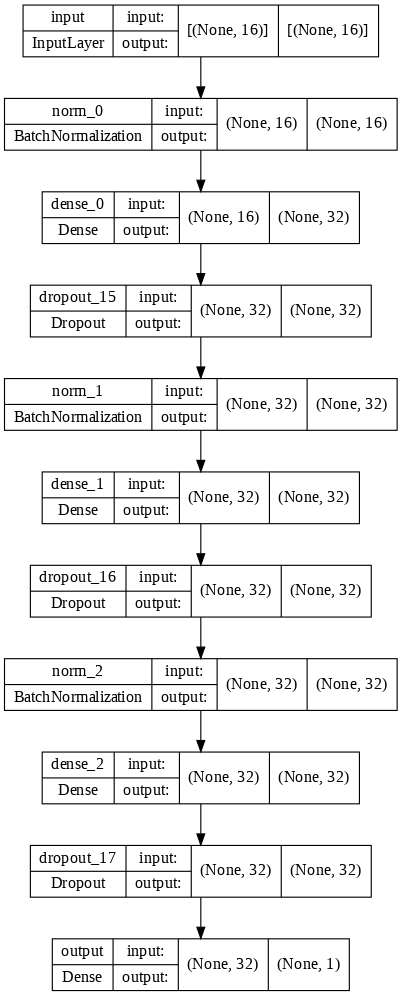

In [ ]:
#plot model
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, rankdir = 'TB', dpi = 81)


In [ ]:
#model summary
model.summary(130)


Model: "model_8"
__________________________________________________________________________________________________________________________________
 Layer (type)                                             Output Shape                                        Param #             
 input (InputLayer)                                       [(None, 16)]                                        0                   
                                                                                                                                  
 norm_0 (BatchNormalization)                              (None, 16)                                          64                  
                                                                                                                                  
 dense_0 (Dense)                                          (None, 32)                                          544                 
                                                                  

In [ ]:
#compile and fit model
model.compile(optimizer = keras.optimizers.SGD(1E-3, momentum = 0.9),
              loss = keras.losses.BinaryCrossentropy(),
              metrics = [keras.metrics.BinaryAccuracy()])

history = model.fit(x = inp_tn, y = out_tn, epochs = 10000, verbose = 0, validation_data = (inp_ts, out_ts),
                    callbacks = [keras.callbacks.EarlyStopping('val_loss', patience = 200, restore_best_weights = True)])


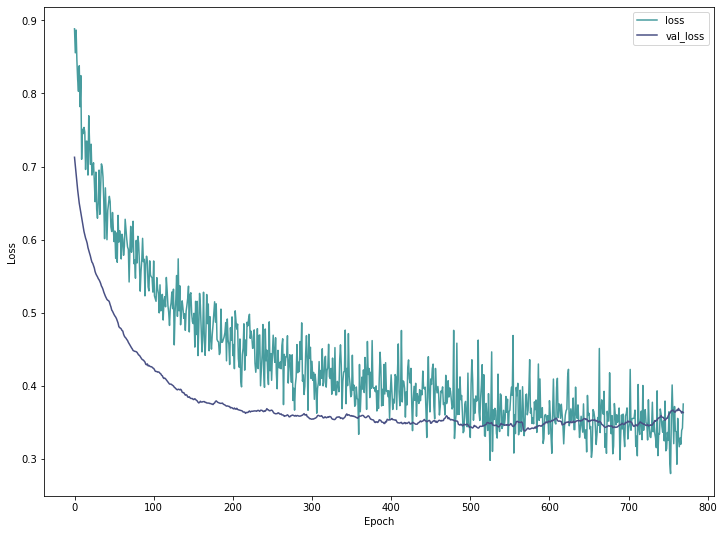

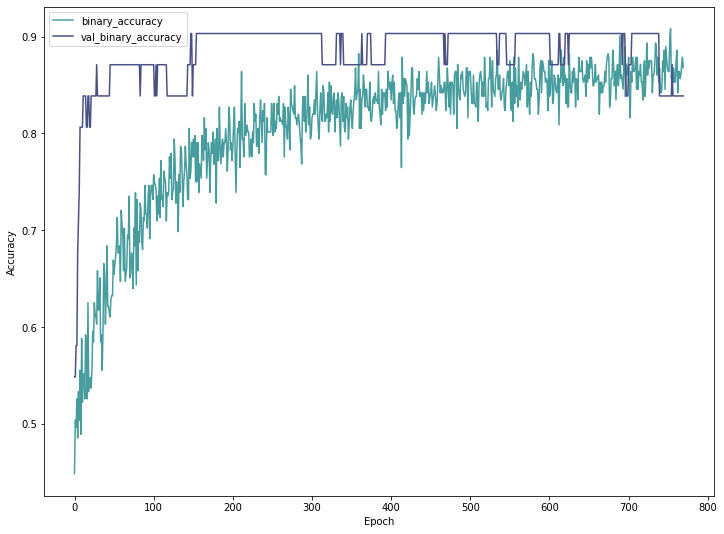

In [ ]:
#plot model history
history = pd.DataFrame(history.history)

history[['loss', 'val_loss']].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.show()

history[['binary_accuracy', 'val_binary_accuracy']].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.show()


In [ ]:
#model evaluation
train_eval = model.evaluate(inp_tn, out_tn, verbose = 0, return_dict = True)
valid_eval = model.evaluate(inp_ts, out_ts, verbose = 0, return_dict = True)

print('Training Evaluation:')
for metric in train_eval:
    print(f'\t{metric.title()}: {train_eval[metric]:.4f}')

print('Validation Evaluation:')
for metric in valid_eval:
    print(f'\t{metric.title()}: {valid_eval[metric]:.4f}')


Training Evaluation:
	Loss: 0.2641
	Binary_Accuracy: 0.9118
Validation Evaluation:
	Loss: 0.3378
	Binary_Accuracy: 0.9032


In [ ]:
#classification report
train_pred = np.round(model.predict(inp_tn).flatten(), 0)
valid_pred = np.round(model.predict(inp_ts).flatten(), 0)

from sklearn.metrics import classification_report
print('Training Classification Report:')
print(classification_report(out_tn, train_pred))

print('\nValidation Classification Report:')
print(classification_report(out_ts, valid_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       127
           1       0.90      0.94      0.92       145

    accuracy                           0.91       272
   macro avg       0.91      0.91      0.91       272
weighted avg       0.91      0.91      0.91       272


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.95      0.90      0.92        20

    accuracy                           0.90        31
   macro avg       0.89      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



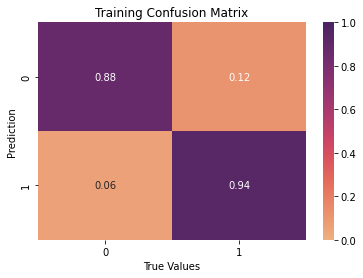

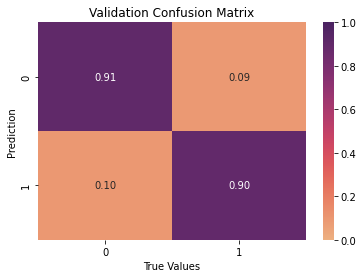

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(out_tn, train_pred, normalize = 'true'),
            vmin = 0, vmax = 1, cmap = 'flare', annot = True, fmt = '.2f')
plt.xlabel('True Values'); plt.ylabel('Prediction'); plt.title('Training Confusion Matrix')
plt.show()

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(out_ts, valid_pred, normalize = 'true'),
            vmin = 0, vmax = 1, cmap = 'flare', annot = True, fmt = '.2f')
plt.xlabel('True Values'); plt.ylabel('Prediction'); plt.title('Validation Confusion Matrix')
plt.show()
